In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

Coord: (285, 553)


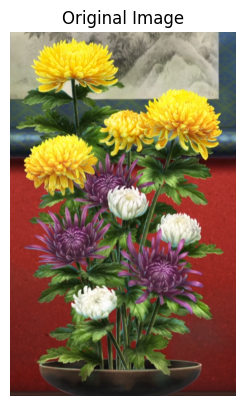

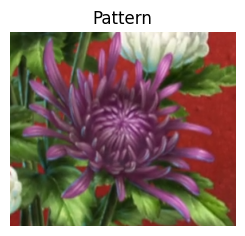

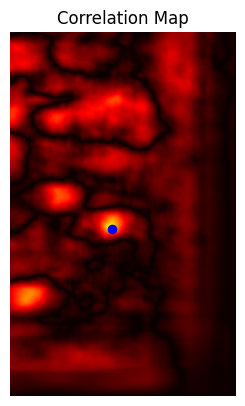

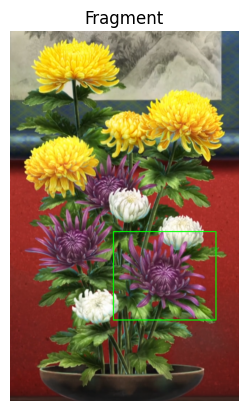

In [11]:
def show_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def fft_template_matching(image, template):
    image_h, image_w = image.shape
    template_h, template_w = template.shape

    #Find upper bound, which is a power of 2 for fft
    pad_h = 2 ** math.ceil(math.log2(image_h + template_h - 1))
    pad_w = 2 ** math.ceil(math.log2(image_w + template_w - 1))

    template = template - np.mean(template)

    image_fft = np.fft.fft2(image, s=(pad_h, pad_w))
    template_fft = np.fft.fft2(template, s=(pad_h, pad_w))

    cross_corr_fft = image_fft * np.conj(template_fft)

    cross_corr = np.fft.ifft2(cross_corr_fft)
    cross_corr = np.abs(cross_corr)

    cross_corr = cross_corr[:image_h, :image_w]

    cross_corr_norm = (cross_corr - cross_corr.min()) / (cross_corr.max() - cross_corr.min())

    #Convert linear np.argmax(cross_corr_norm) into tuple (y, x)
    max_y, max_x = np.unravel_index(np.argmax(cross_corr_norm), cross_corr_norm.shape)

    return max_x, max_y, cross_corr_norm

image_path = "./drive/MyDrive/COS_Labs/Lab4/flowers.png"
pattern_path = "./drive/MyDrive/COS_Labs/Lab4/flowers2.png"

image = plt.imread(image_path)
template = plt.imread(pattern_path)
gray_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
gray_template = np.dot(template[..., :3], [0.2989, 0.5870, 0.1140])

x, y, correlation_map = fft_template_matching(gray_image, gray_template)

print(f"Coord: ({x}, {y})")

plt.subplot(1, 2, 1)
show_image(image, title="Original Image")
plt.subplot(1, 2, 1)
show_image(template, title="Pattern")
plt.subplot(1, 2, 1)
plt.imshow(correlation_map, cmap='hot')
plt.scatter(x, y, color='blue')
plt.title("Correlation Map")
plt.axis('off')
plt.show()

top_left = (x,y)
h, w = template.shape[:2]
bottom_right = (top_left[0] + w, top_left[1] + h)

origin_image = cv2.imread(image_path)
origin_image = cv2.rectangle(origin_image, top_left, bottom_right, (0, 255, 0), 2)
origin_image = cv2.cvtColor(origin_image, cv2.COLOR_BGR2RGB)
plt.imshow(origin_image)
plt.title("Fragment")
plt.axis('off')
plt.show()


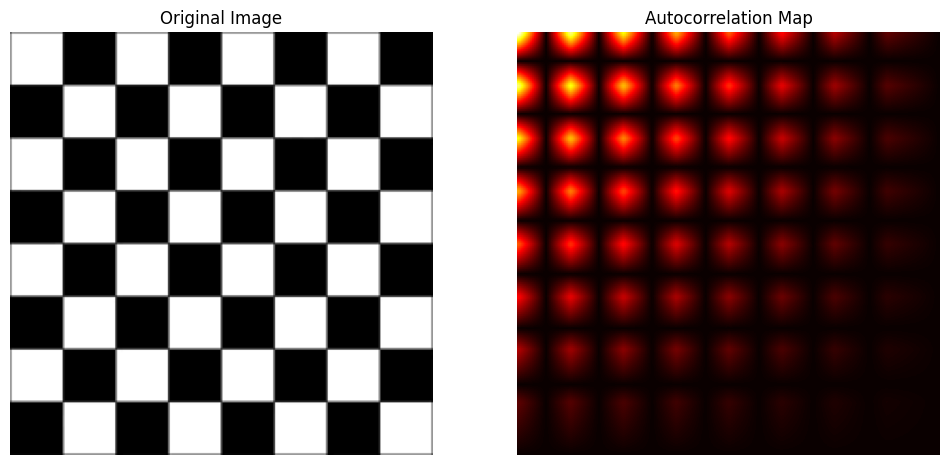

In [20]:
# АВТОКОРРЕЛЯЦИЯ

def autocorrelation(image):
    image_h, image_w = image.shape

    pad_h = 2 * image_h - 1
    pad_w = 2 * image_w - 1

    centered_image = image - np.mean(image)

    image_fft = np.fft.fft2(centered_image, s=(pad_h, pad_w))

    auto_corr_fft = image_fft * np.conj(image_fft)

    auto_corr = np.fft.ifft2(auto_corr_fft)
    auto_corr = np.abs(auto_corr)

    auto_corr = auto_corr[:image_h, :image_w]

    auto_corr_norm = (auto_corr - auto_corr.min()) / (auto_corr.max() - auto_corr.min())

    return auto_corr_norm

image = plt.imread("./drive/MyDrive/COS_Labs/Lab4/board.png")
gray_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
correlation_map = autocorrelation(gray_image)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(image, cmap='gray')
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(correlation_map, cmap='hot')
ax2.set_title("Autocorrelation Map")
ax2.axis('off')

plt.show()

plt.imsave("autocorrelation_map.jpg", correlation_map, cmap='hot')